# Grover's Algorithm

See [Grover's Algorithm](https://pennylane.ai/qml/demos/tutorial_grovers_algorithm) from Ludmila Betelho.

In [38]:
import sys
print(sys.executable)

/Users/alain/Workspace/GitHub/quantum-computing/.venv/bin/python


In [39]:
import matplotlib.pyplot as plt
import pennylane as qml
import numpy as np

wires=[0, 1]
Initial state: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
After applying the Hadamard gates: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
execution_results: [0.25 0.25 0.25 0.25]


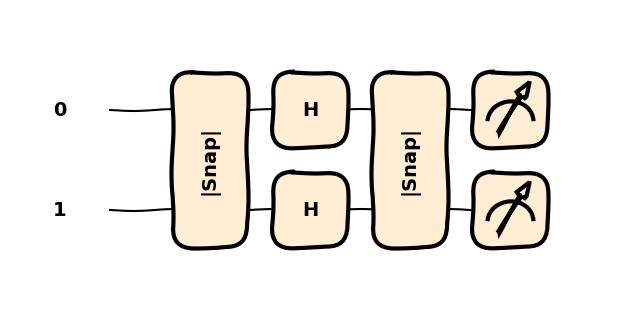

In [78]:
NUM_QUBITS = 2
dev = qml.device("default.qubit", wires=NUM_QUBITS)
wires = list(range(NUM_QUBITS))
print(f"wires={wires}")


def equal_superposition(wires):
    for wire in wires:
        qml.Hadamard(wires=wire)


@qml.qnode(dev)
def circuit():
    qml.Snapshot("Initial state")
    equal_superposition(wires)
    qml.Snapshot("After applying the Hadamard gates")
    return qml.probs(wires=wires)  # Probability of finding a computational basis state on the wires

style = "sketch"
qml.drawer.use_style(style)
fig, ax = qml.draw_mpl(circuit, level="device")()
# fig.set_size_inches(6, 4)  # Changer la taille après coup
fig.savefig("circuit_diagram.png")

results = qml.snapshots(circuit)()

for k, result in results.items():
    print(f"{k}: {result}")

# L'état initial

## États de base d'un qubit unique

Pour un qubit unique, les états de base sont :

$$\ket{0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad \ket{1} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

## États de base d'un système à n qubits

Dans un circuit quantique, tous les qubits sont initialisés dans l'état $\ket{0}$ (état fondamental).

Pour $n$ qubits → état initial = $\ket{0}^{\otimes n} = \ket{00...0}$

Donc pour votre code avec `NUM_QUBITS = 2` :
- Qubit 0 : $\ket{0}$
- Qubit 1 : $\ket{0}$
- Système : $\ket{0} \otimes \ket{0} = \ket{00}$

## Construction de l'état à 2 qubits

Pour un système à 2 qubits, on utilise le **produit tensoriel** (noté $\otimes$) pour construire les états de base :

$$\ket{00} = \ket{0} \otimes \ket{0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \cdot 1 \\ 1 \cdot 0 \\ 0 \cdot 1 \\ 0 \cdot 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}$$

## Correspondance avec la sortie PennyLane

La sortie PennyLane `[1.+0.j 0.+0.j 0.+0.j 0.+0.j]` représente les amplitudes de l'état $\ket{00}$ dans la base computationnelle :

| Position | État | Amplitude |
|----------|------|-----------|
| 0 | $\ket{00}$ | 1 |
| 1 | $\ket{01}$ | 0 |
| 2 | $\ket{10}$ | 0 |
| 3 | $\ket{11}$ | 0 |

L'état initial `[1, 0, 0, 0]` correspond donc à $\ket{00}$.

# L'état après les portes Hadamard


## La porte Hadamard sur un qubit unique

La porte Hadamard $H$ agit sur les états de base comme suit :

$$H\ket{0} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1}), \quad H\ket{1} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})$$

En notation matricielle :

$$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

## Application sur un système à 2 qubits

Pour appliquer Hadamard sur **chaque** qubit du système $\ket{00}$, on utilise le produit tensoriel $(H \otimes H)$ :

$$\ket{\psi_1} = (H \otimes H)\ket{00} = (H\ket{0}) \otimes (H\ket{0})$$

$$= \left[\frac{1}{\sqrt{2}}(\ket{0} + \ket{1})\right] \otimes \left[\frac{1}{\sqrt{2}}(\ket{0} + \ket{1})\right]$$

$$= \frac{1}{2}(\ket{0} + \ket{1}) \otimes (\ket{0} + \ket{1})$$

En développant le produit tensoriel :

$$= \frac{1}{2}[\ket{0} \otimes \ket{0} + \ket{0} \otimes \ket{1} + \ket{1} \otimes \ket{0} + \ket{1} \otimes \ket{1}]$$

$$= \frac{1}{2}(\ket{00} + \ket{01} + \ket{10} + \ket{11})$$

## Vecteur d'état résultant

En utilisant les représentations vectorielles :

$$\ket{\psi_1} = \frac{1}{2}\begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} + \frac{1}{2}\begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} + \frac{1}{2}\begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} + \frac{1}{2}\begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0.5 \\ 0.5 \\ 0.5 \\ 0.5 \end{pmatrix}$$

## Correspondance avec la sortie PennyLane

La sortie PennyLane `[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]` correspond à l'état $\frac{1}{2}(\ket{00} + \ket{01} + \ket{10} + \ket{11})$.

| Position | État | Amplitude |
|----------|------|-----------|
| 0 | $\ket{00}$ | $\frac{1}{2}$ |
| 1 | $\ket{01}$ | $\frac{1}{2}$ |
| 2 | $\ket{10}$ | $\frac{1}{2}$ |
| 3 | $\ket{11}$ | $\frac{1}{2}$ |

Donc l'état après Hadamard `[0.5, 0.5, 0.5, 0.5]` correspond bien à une **superposition égale** de tous les états de base.

# Les probabilités de mesure

## Relation entre amplitudes et probabilités

La probabilité de mesurer un état de base $\ket{i}$ est le **carré du module** de son amplitude :

$$P(\ket{i}) = |\langle i | \psi_1 \rangle|^2$$

## Calcul des probabilités

Pour chaque état de base :

$$P(\ket{00}) = \left|\frac{1}{2}\right|^2 = 0.25$$
$$P(\ket{01}) = \left|\frac{1}{2}\right|^2 = 0.25$$
$$P(\ket{10}) = \left|\frac{1}{2}\right|^2 = 0.25$$
$$P(\ket{11}) = \left|\frac{1}{2}\right|^2 = 0.25$$

## Correspondance avec la sortie PennyLane

La sortie `execution_results: [0.25 0.25 0.25 0.25]` représente ces probabilités :

| Position | État | Amplitude | Probabilité |
|----------|------|-----------|-------------|
| 0 | $\ket{00}$ | $0.5$ | $0.25$ |
| 1 | $\ket{01}$ | $0.5$ | $0.25$ |
| 2 | $\ket{10}$ | $0.5$ | $0.25$ |
| 3 | $\ket{11}$ | $0.5$ | $0.25$ |

Chaque état a une probabilité égale ($\frac{1}{4}$) d'être mesuré : **distribution uniforme**.

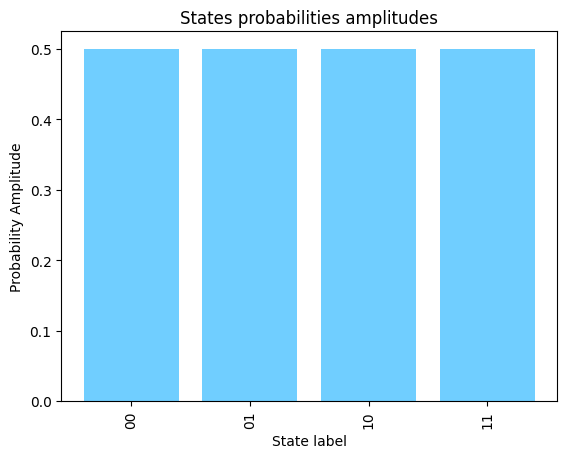

In [41]:
y = np.real(results["After applying the Hadamard gates"])
bit_strings = [f"{x:0{NUM_QUBITS}b}" for x in range(len(y))]

plt.bar(bit_strings, y, color = "#70CEFF")

plt.xticks(rotation="vertical")
plt.xlabel("State label")
plt.ylabel("Probability Amplitude")
plt.title("States probabilities amplitudes")
plt.show()

execution_results: [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]


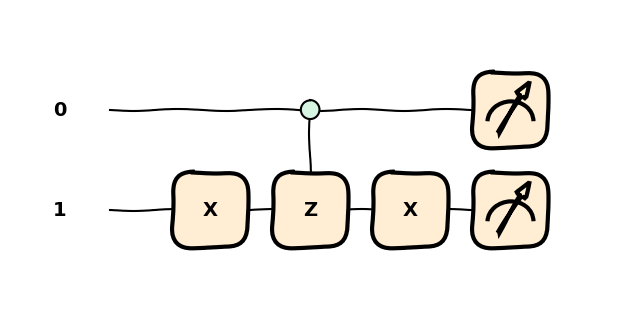

In [79]:
dev = qml.device("default.qubit", wires=NUM_QUBITS)

@qml.qnode(dev)
def circuit():
    #qml.Snapshot("Initial state |00>")
    # Flipping the marked state
    qml.FlipSign([0, 0], wires=wires)
    #qml.Snapshot("After flipping it")
    return qml.state()

style = "sketch"
qml.drawer.use_style(style)
fig, ax = qml.draw_mpl(circuit, level="device")()
fig.savefig("circuit_diagram_oracle.png")

results = qml.snapshots(circuit)()

for k, result in results.items():
    print(f"{k}: {result}")


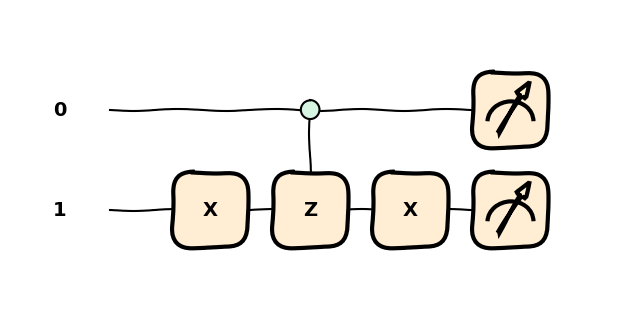

In [89]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=1)
    qml.ctrl(qml.PauliZ, (0), control_values=(0))(wires=1)
    qml.PauliX(wires=1)
    return qml.state()

style = "sketch"
qml.drawer.use_style(style)
fig, ax = qml.draw_mpl(circuit, level="device")()
# fig.savefig("circuit_diagram_oracle.png")

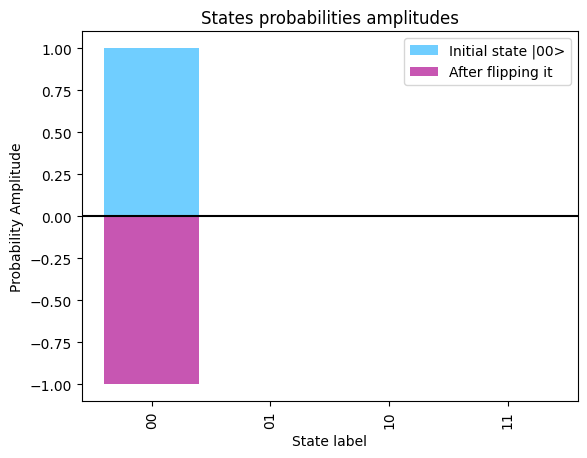

In [54]:
y1 = np.real(results["Initial state |00>"])
y2 = np.real(results["After flipping it"])

bit_strings = [f"{x:0{NUM_QUBITS}b}" for x in range(len(y))]

plt.bar(bit_strings, y1, color = "#70CEFF")
plt.bar(bit_strings, y2, color = "#C756B2")

plt.xticks(rotation="vertical")
plt.xlabel("State label")
plt.ylabel("Probability Amplitude")
plt.title("States probabilities amplitudes")

plt.legend(["Initial state |00>", "After flipping it"])
plt.axhline(y=0.0, color="k", linestyle="-")
plt.show()

NUM_QUBITS=2
omega before setting marked state: [0. 0.]
Before querying the Oracle: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
After querying the Oracle: [-0.5+0.j  0.5+0.j  0.5+0.j  0.5+0.j]
execution_results: [0.25 0.25 0.25 0.25]


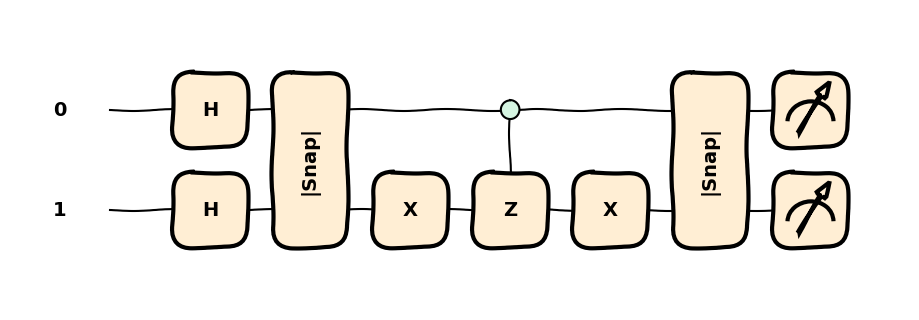

In [57]:
NUM_QUBITS = 2
print(f"NUM_QUBITS={NUM_QUBITS}")

omega = np.zeros(NUM_QUBITS) # État de base en notation binaire correspondant à l'état marqué |00⟩
# omega = np.array([1, 0])  # Marquer l'état |10⟩
print(f"omega before setting marked state: {omega}")

def oracle(wires, omega):
    qml.FlipSign(omega, wires=wires)

dev = qml.device("default.qubit", wires=NUM_QUBITS)

@qml.qnode(dev)
def circuit():
    equal_superposition(wires)
    qml.Snapshot("Before querying the Oracle")

    oracle(wires, omega)
    qml.Snapshot("After querying the Oracle")

    return qml.probs(wires=wires)

style = "sketch"
qml.drawer.use_style(style)
fig, ax = qml.draw_mpl(circuit, level="device")()

results = qml.snapshots(circuit)()

for k, result in results.items():
    print(f"{k}: {result}")

## Fonctionnement de `qml.FlipSign`

### 1. **Interprétation du vecteur `omega`**

Le vecteur `omega = [0., 0.]` est interprété comme un **état de base en notation binaire** :

- `omega[0] = 0` → qubit 0 dans l'état $\ket{0}$
- `omega[1] = 0` → qubit 1 dans l'état $\ket{0}$

Donc `omega = [0, 0]` correspond à l'état $\ket{00}$, qui est **le premier élément** du vecteur d'état (position 0).

### 2. **Action de l'oracle de Grover**

`FlipSign` implémente l'**oracle de Grover** qui applique un changement de phase :

$$O_\omega \ket{x} = \begin{cases} -\ket{x} & \text{si } x = \omega \\ +\ket{x} & \text{sinon} \end{cases}$$

Dans votre cas, avec $\omega = [0, 0]$ :

$$O_{00} = \begin{pmatrix} -1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}$$

### 3. **Application sur votre état**

**Avant l'oracle** :
$$\ket{\psi} = \frac{1}{2}(\ket{00} + \ket{01} + \ket{10} + \ket{11}) = \begin{pmatrix} 0.5 \\ 0.5 \\ 0.5 \\ 0.5 \end{pmatrix}$$

**Après l'oracle** :
$$O_{00}\ket{\psi} = \frac{1}{2}(-\ket{00} + \ket{01} + \ket{10} + \ket{11}) = \begin{pmatrix} -0.5 \\ 0.5 \\ 0.5 \\ 0.5 \end{pmatrix}$$

Seul l'état $\ket{00}$ (premier élément) a son signe inversé ! ✓

## Correspondance omega ↔ position

| `omega` | État marqué | Position dans le vecteur | Élément qui change de signe |
|---------|-------------|--------------------------|------------------------------|
| `[0, 0]` | $\ket{00}$ | 0 | Premier élément |
| `[0, 1]` | $\ket{01}$ | 1 | Deuxième élément |
| `[1, 0]` | $\ket{10}$ | 2 | Troisième élément |
| `[1, 1]` | $\ket{11}$ | 3 | Quatrième élément |

## Test pour vérifier

Essayez de changer `omega` :

```python
omega = np.array([1, 0])  # Marque |10⟩
```

Vous devriez voir le **troisième** élément changer de signe :
```
After querying the Oracle: [0.5+0.j 0.5+0.j -0.5+0.j 0.5+0.j]
```

**Résumé** : `omega = [0, 0]` marque l'état $\ket{00}$, donc `FlipSign` inverse le signe de la première composante du vecteur d'état ! 🎯

## Matrice de l'oracle FlipSign

### 1. **Forme générale**

Pour un état marqué $\ket{\omega}$, l'oracle est une **matrice diagonale** :

$$O_\omega = I - 2\ket{\omega}\langle \omega |$$

où :
- $I$ est la matrice identité
- $\ket{\omega}\bra{\omega}$ est le **projecteur** sur l'état marqué

### 2. **Explication du projecteur**

Le projecteur $\ket{\omega}\bra{\omega}$ est une matrice qui vaut :

$$(\ket{\omega}\bra{\omega})\ket{x} = \begin{cases} \ket{\omega} & \text{si } x = \omega \\ 0 & \text{sinon} \end{cases}$$

C'est la matrice qui "sélectionne" l'état $\ket{\omega}$.

## Cas concrets pour 2 qubits

### **Cas 1 : `omega = [0, 0]` → État marqué $\ket{00}$**

$$\ket{00} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}$$

Le projecteur :
$$\ket{00}\bra{00} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} \begin{pmatrix} 1 & 0 & 0 & 0 \end{pmatrix} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{pmatrix}$$

L'oracle :
$$O_{00} = I - 2\ket{00}\bra{00} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix} - 2\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{pmatrix} = \begin{pmatrix} -1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}$$

### **Cas 2 : `omega = [1, 0]` → État marqué $\ket{10}$**

$$\ket{10} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}$$

L'oracle :
$$O_{10} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & -1 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}$$

### **Cas 3 : `omega = [1, 1]` → État marqué $\ket{11}$**

$$O_{11} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{pmatrix}$$

## Structure générale

La matrice $O_\omega$ est **toujours diagonale** avec :

$$O_\omega = \text{diag}(d_0, d_1, d_2, d_3)$$

où :
$$d_i = \begin{cases} -1 & \text{si l'état } i \text{ correspond à } \omega \\ +1 & \text{sinon} \end{cases}$$

## Vérification sur votre exemple

Avec `omega = [0, 0]` et l'état $\frac{1}{2}(\ket{00} + \ket{01} + \ket{10} + \ket{11})$ :

$$
O_{00} \begin{pmatrix} 0.5 \\ 0.5 \\ 0.5 \\ 0.5 \end{pmatrix} = \begin{pmatrix} -1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix} \begin{pmatrix} 0.5 \\ 0.5 \\ 0.5 \\ 0.5 \end{pmatrix} = \begin{pmatrix} -0.5 \\ 0.5 \\ 0.5 \\ 0.5 \end{pmatrix}
$$

## Propriétés mathématiques

1. **Hermitienne** : $O_\omega = O_\omega^\dagger$
2. **Unitaire** : $O_\omega O_\omega^\dagger = I$
3. **Involutive** : $O_\omega^2 = I$ (appliquer deux fois donne l'identité)
4. **Valeurs propres** : $+1$ (dégénérescence $2^n - 1$) et $-1$ (simple)

**Résumé** : `FlipSign` implémente la matrice $O_\omega = I - 2\ket{\omega}\bra{\omega}$, qui est diagonale avec $-1$ à la position correspondant à l'état marqué et $+1$ partout ailleurs ! 🎯

# Explication de $\ket{00}$ et $\bra{00}$

## Notation de Dirac (bra-ket)

Paul Dirac a introduit cette notation élégante pour représenter les vecteurs quantiques :

- **Ket** : $\ket{\psi}$ représente un **vecteur colonne** (état quantique)
- **Bra** : $\bra{\psi}$ représente un **vecteur ligne** (dual du ket)

---

## Le Ket : $\ket{00}$

### Définition

$\ket{00}$ est un **vecteur colonne** représentant l'état où les deux qubits sont dans l'état $\ket{0}$ :

$$\ket{00} = \ket{0} \otimes \ket{0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}$$

### Généralisation

Pour 2 qubits, les 4 kets de base sont :

$$\ket{00} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}, \quad \ket{01} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}, \quad \ket{10} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}, \quad \ket{11} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}$$

---

## Conjugaison complexe

### Qu'est-ce qu'un nombre complexe ?

Un nombre complexe $z$ s'écrit sous la forme :

$$z = a + bi$$

où :
- $a$ est la **partie réelle** : $\text{Re}(z) = a$
- $b$ est la **partie imaginaire** : $\text{Im}(z) = b$
- $i$ est l'**unité imaginaire** : $i^2 = -1$

### Définition de la conjugaison complexe

Le **conjugué complexe** de $z = a + bi$, noté $z^*$ ou $\bar{z}$, est obtenu en **changeant le signe de la partie imaginaire** :

$$z^* = a - bi$$

### Exemples concrets

| Nombre $z$ | Conjugué $z^*$ |
|------------|----------------|
| $3 + 4i$ | $3 - 4i$ |
| $2 - 5i$ | $2 + 5i$ |
| $-1 + i$ | $-1 - i$ |
| $7$ (réel pur) | $7$ |
| $3i$ (imaginaire pur) | $-3i$ |

### Propriétés importantes

1. **Double conjugaison** : $(z^*)^* = z$
2. **Somme** : $(z_1 + z_2)^* = z_1^* + z_2^*$
3. **Produit** : $(z_1 \cdot z_2)^* = z_1^* \cdot z_2^*$
4. **Module** : $|z|^2 = z \cdot z^* = a^2 + b^2$

### Représentation géométrique

Dans le plan complexe :
- $z = a + bi$ est représenté par le point $(a, b)$
- $z^* = a - bi$ est le **reflet** de $z$ par rapport à l'axe réel (symétrie horizontale)

```
        Im
         ^
         |
    z = a+bi •
         |
    -----+-----> Re
         |
  z* = a-bi •
         |
```

---

## Le Bra : $\bra{00}$

### Définition

$\bra{00}$ est le **conjugué hermitien** (transposé conjugué) de $\ket{00}$ :

$$\bra{00} = \ket{00}^\dagger = \left(\ket{00}^*\right)^T$$

où :
- $^*$ = **conjugaison complexe** (appliquée à chaque composante)
- $^T$ = **transposition** (colonne → ligne)

### Calcul explicite

$$\ket{00} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} \quad \Rightarrow \quad \bra{00} = \begin{pmatrix} 1^* & 0^* & 0^* & 0^* \end{pmatrix} = \begin{pmatrix} 1 & 0 & 0 & 0 \end{pmatrix}$$

Ici, les composantes sont réelles donc $1^* = 1$ et $0^* = 0$.

### Exemple avec amplitudes complexes

Si $\ket{\psi} = \begin{pmatrix} 1+2i \\ 3-i \\ 0 \\ 4i \end{pmatrix}$, alors :

$$\bra{\psi} = \begin{pmatrix} (1+2i)^* & (3-i)^* & 0^* & (4i)^* \end{pmatrix} = \begin{pmatrix} 1-2i & 3+i & 0 & -4i \end{pmatrix}$$

### Généralisation pour 2 qubits

$$\bra{00} = \begin{pmatrix} 1 & 0 & 0 & 0 \end{pmatrix}, \quad \bra{01} = \begin{pmatrix} 0 & 1 & 0 & 0 \end{pmatrix}$$

$$\bra{10} = \begin{pmatrix} 0 & 0 & 1 & 0 \end{pmatrix}, \quad \bra{11} = \begin{pmatrix} 0 & 0 & 0 & 1 \end{pmatrix}$$

---

## Relation entre Bra et Ket

Pour tout état $\ket{\psi}$ :

$$\bra{\psi} = \ket{\psi}^\dagger$$

L'opération $\dagger$ (dague) s'appelle le **conjugué hermitien** ou **adjoint hermitien**.

### Étapes du calcul

Pour passer de $\ket{\psi}$ à $\bra{\psi}$ :

1. **Conjuguer** chaque composante : $\alpha \to \alpha^*$
2. **Transposer** le vecteur : colonne → ligne

---

## Produit scalaire : $\langle 00 | 00 \rangle$

Le produit d'un bra et d'un ket donne un **scalaire complexe** (nombre) :

$$\langle 00 | 00 \rangle = \bra{00}\ket{00} = \begin{pmatrix} 1 & 0 & 0 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = 1 \cdot 1 + 0 \cdot 0 + 0 \cdot 0 + 0 \cdot 0 = 1$$

### Formule générale

Pour deux états $\ket{\phi} = \begin{pmatrix} \alpha_0 \\ \alpha_1 \\ \alpha_2 \\ \alpha_3 \end{pmatrix}$ et $\ket{\psi} = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \beta_3 \end{pmatrix}$ :

$$\langle \phi | \psi \rangle = \alpha_0^* \beta_0 + \alpha_1^* \beta_1 + \alpha_2^* \beta_2 + \alpha_3^* \beta_3$$

**Important** : La conjugaison s'applique aux composantes du bra (à gauche) !

### Orthogonalité

Les états de base sont **orthonormés** :

$$\langle i | j \rangle = \delta_{ij} = \begin{cases} 1 & \text{si } i = j \\ 0 & \text{si } i \neq j \end{cases}$$

**Exemples** :

$$\langle 00 | 00 \rangle = 1, \quad \langle 00 | 01 \rangle = 0, \quad \langle 00 | 10 \rangle = 0, \quad \langle 00 | 11 \rangle = 0$$

---

## Produit extérieur : $\ket{00}\bra{00}$

Le produit d'un ket et d'un bra donne une **matrice** (projecteur) :

$$\ket{00}\bra{00} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} \begin{pmatrix} 1 & 0 & 0 & 0 \end{pmatrix} = \begin{pmatrix} 1 \times 1 & 1 \times 0 & 1 \times 0 & 1 \times 0 \\ 0 \times 1 & 0 \times 0 & 0 \times 0 & 0 \times 0 \\ 0 \times 1 & 0 \times 0 & 0 \times 0 & 0 \times 0 \\ 0 \times 1 & 0 \times 0 & 0 \times 0 & 0 \times 0 \end{pmatrix}$$

$$= \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{pmatrix}$$

C'est exactement le **projecteur** utilisé dans l'oracle FlipSign !

### Propriété du projecteur

Le projecteur $P_\omega = \ket{\omega}\bra{\omega}$ a la propriété :

$$P_\omega \ket{\psi} = \begin{cases} \ket{\omega} & \text{si } \ket{\psi} = \ket{\omega} \\ 0 & \text{si } \ket{\psi} \perp \ket{\omega} \end{cases}$$

Il "extrait" la composante de $\ket{\psi}$ dans la direction $\ket{\omega}$.

---

## Tableau récapitulatif

| Notation | Type | Dimension | Représentation |
|----------|------|-----------|----------------|
| $\ket{00}$ | Vecteur colonne | $4 \times 1$ | $\begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}$ |
| $\bra{00}$ | Vecteur ligne | $1 \times 4$ | $\begin{pmatrix} 1 & 0 & 0 & 0 \end{pmatrix}$ |
| $\langle 00 | 00 \rangle$ | Scalaire | $1 \times 1$ | $1$ |
| $\ket{00}\bra{00}$ | Matrice | $4 \times 4$ | Projecteur |

---

## Mnémotechnique

Pensez à **"bra-ket" = "bracket"** (crochet en anglais) :

$$\underbrace{\bra{\phi}}_{\text{bra}} \overbrace{\ket{\psi}}^{\text{ket}} = \langle \phi | \psi \rangle \quad \text{(produit scalaire)}$$

### Ordre des opérations

- **Bra à gauche, Ket à droite** : $\langle \phi | \psi \rangle$ → Scalaire
- **Ket à gauche, Bra à droite** : $\ket{\psi}\bra{\phi}$ → Matrice

---

## Résumé

1. **$\ket{00}$** est un vecteur colonne représentant l'état quantique
2. **$\bra{00}$** est sa version ligne avec conjugaison complexe
3. **Conjugaison complexe** : $z^* = a - bi$ si $z = a + bi$
4. **$\langle 00 | 00 \rangle$** est le produit scalaire (scalaire)
5. **$\ket{00}\bra{00}$** est le produit extérieur (matrice projecteur)

La conjugaison complexe est essentielle car elle garantit que le produit scalaire $\langle \psi | \psi \rangle$ est toujours **réel et positif**, ce qui correspond à une probabilité !

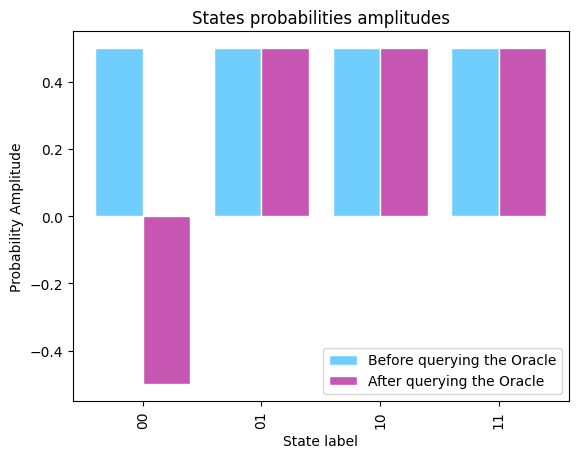

In [58]:
y1 = np.real(results["Before querying the Oracle"])
y2 = np.real(results["After querying the Oracle"])

bit_strings = [f"{x:0{NUM_QUBITS}b}" for x in range(len(y1))]

bar_width = 0.4

rect_1 = np.arange(0, len(y1))
rect_2 = [x + bar_width for x in rect_1]

plt.bar(
    rect_1,
    y1,
    width=bar_width,
    edgecolor="white",
    color = "#70CEFF",
    label="Before querying the Oracle",
)
plt.bar(
    rect_2,
    y2,
    width=bar_width,
    edgecolor="white",
    color = "#C756B2",
    label="After querying the Oracle",
)

plt.xticks(rect_1 + 0.2, bit_strings, rotation="vertical")
plt.xlabel("State label")
plt.ylabel("Probability Amplitude")
plt.title("States probabilities amplitudes")

plt.legend()
plt.show()

oracle wires: [0, 1]
Uniform superposition |s>: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
State marked by Oracle: [-0.5+0.j  0.5+0.j  0.5+0.j  0.5+0.j]
Amplitude after diffusion: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
execution_results: [1. 0. 0. 0.]


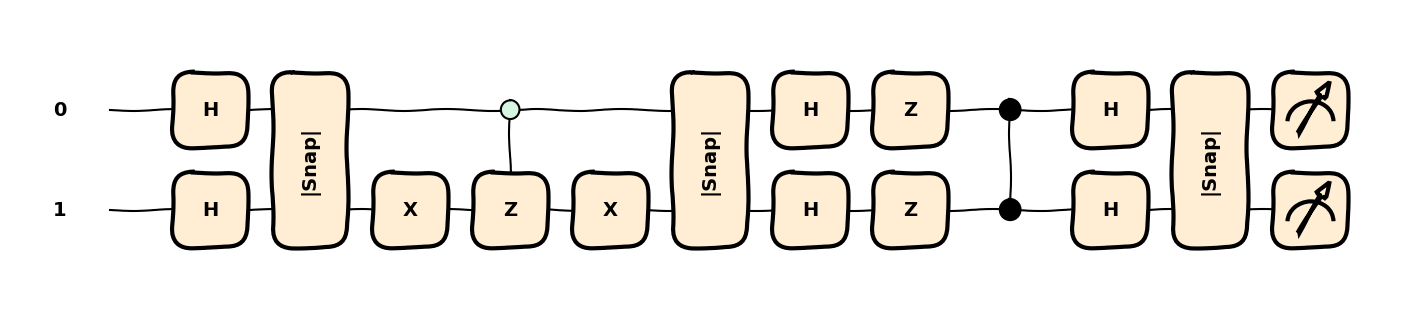

In [60]:
dev = qml.device("default.qubit", wires=NUM_QUBITS)

print(f"oracle wires: {wires}")

def diffusion_operator(wires):
    for wire in wires:
        qml.Hadamard(wires=wire)
        qml.PauliZ(wires=wire)
    qml.ctrl(qml.PauliZ, 0)(wires=1)
    for wire in wires:
        qml.Hadamard(wires=wire)


@qml.qnode(dev)
def circuit():
    equal_superposition(wires)
    qml.Snapshot("Uniform superposition |s>")

    oracle(wires, omega)
    qml.Snapshot("State marked by Oracle")
    diffusion_operator(wires)

    qml.Snapshot("Amplitude after diffusion")
    return qml.probs(wires=wires)


results = qml.snapshots(circuit)()

style = "sketch"
qml.drawer.use_style(style)
fig, ax = qml.draw_mpl(circuit, level="device")()

for k, result in results.items():
    print(f"{k}: {result}")

execution_results: [0.48065948 0.00128937 0.00128937 0.00128937 0.00128937 0.00128937
 0.00128937 0.00128937 0.00128937 0.00128937 0.00128937 0.00128937
 0.00128937 0.00128937 0.00128937 0.00128937 0.00128937 0.00128937
 0.00128937 0.00128937 0.00128937 0.00128937 0.00128937 0.00128937
 0.00128937 0.00128937 0.00128937 0.00128937 0.00128937 0.00128937
 0.00128937 0.48065948]


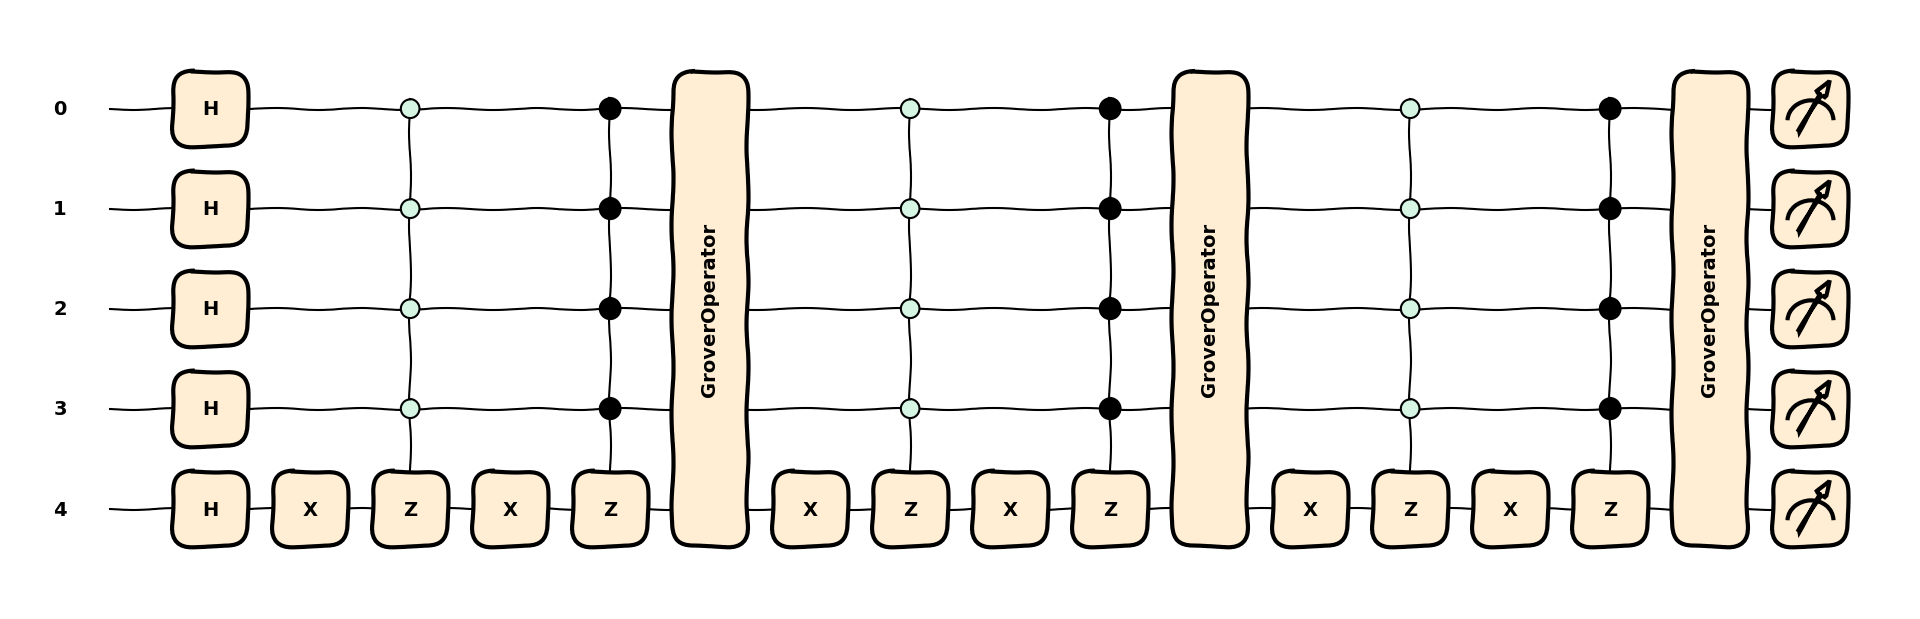

In [29]:
NUM_QUBITS = 5

omega = np.array([np.zeros(NUM_QUBITS), np.ones(NUM_QUBITS)])

M = len(omega)
N = 2**NUM_QUBITS
wires = list(range(NUM_QUBITS))

dev = qml.device("default.qubit", wires=NUM_QUBITS)

@qml.qnode(dev)
def circuit():
    iterations = int(np.round(np.sqrt(N / M) * np.pi / 4))

    # Initial state preparation
    equal_superposition(wires)

    # Grover's iterator
    for _ in range(iterations):
        for omg in omega:
            oracle(wires, omg)
        qml.templates.GroverOperator(wires)

    return qml.probs(wires=wires)


results = qml.snapshots(circuit)()

style = "sketch"
qml.drawer.use_style(style)
fig, ax = qml.draw_mpl(circuit, level="device")()

for k, result in results.items():
    print(f"{k}: {result}")

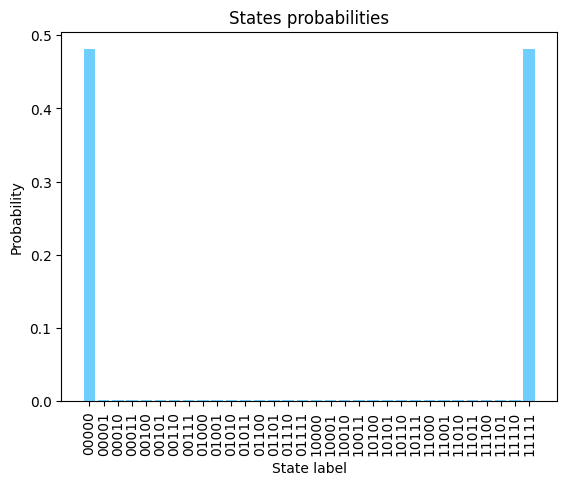

In [13]:
y = results["execution_results"]
bit_strings = [f"{x:0{NUM_QUBITS}b}" for x in range(len(y))]

plt.bar(bit_strings, results["execution_results"], color = "#70CEFF")

plt.xticks(rotation="vertical")
plt.xlabel("State label")
plt.ylabel("Probability")
plt.title("States probabilities")

plt.show()